In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


Dataset loaded successfully!
   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Cat

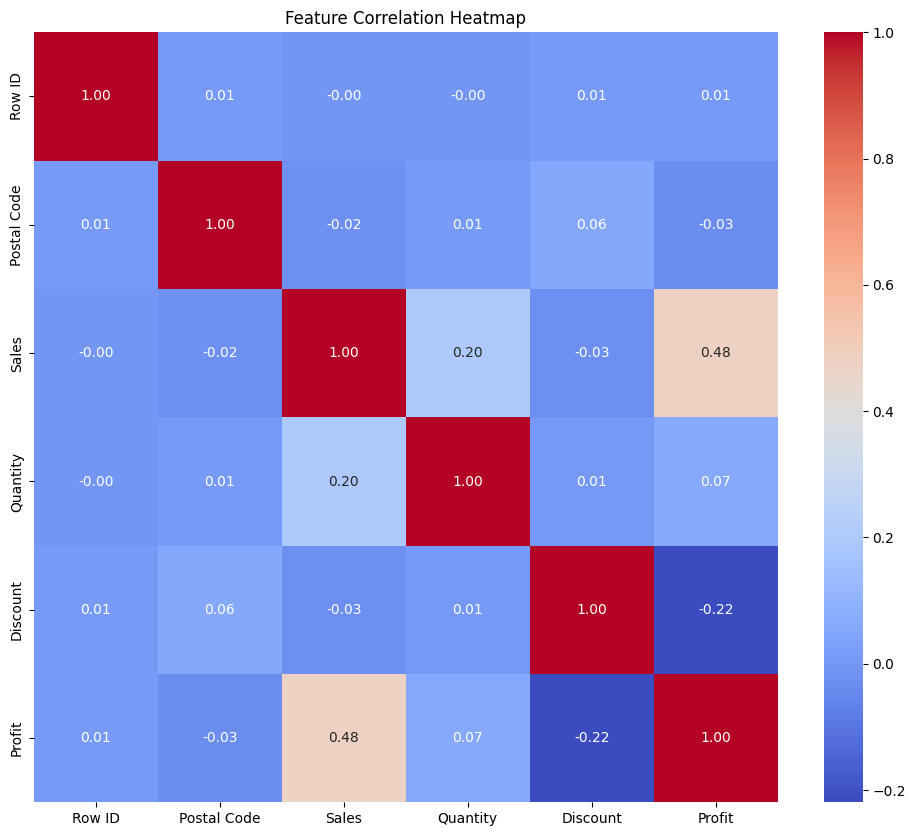

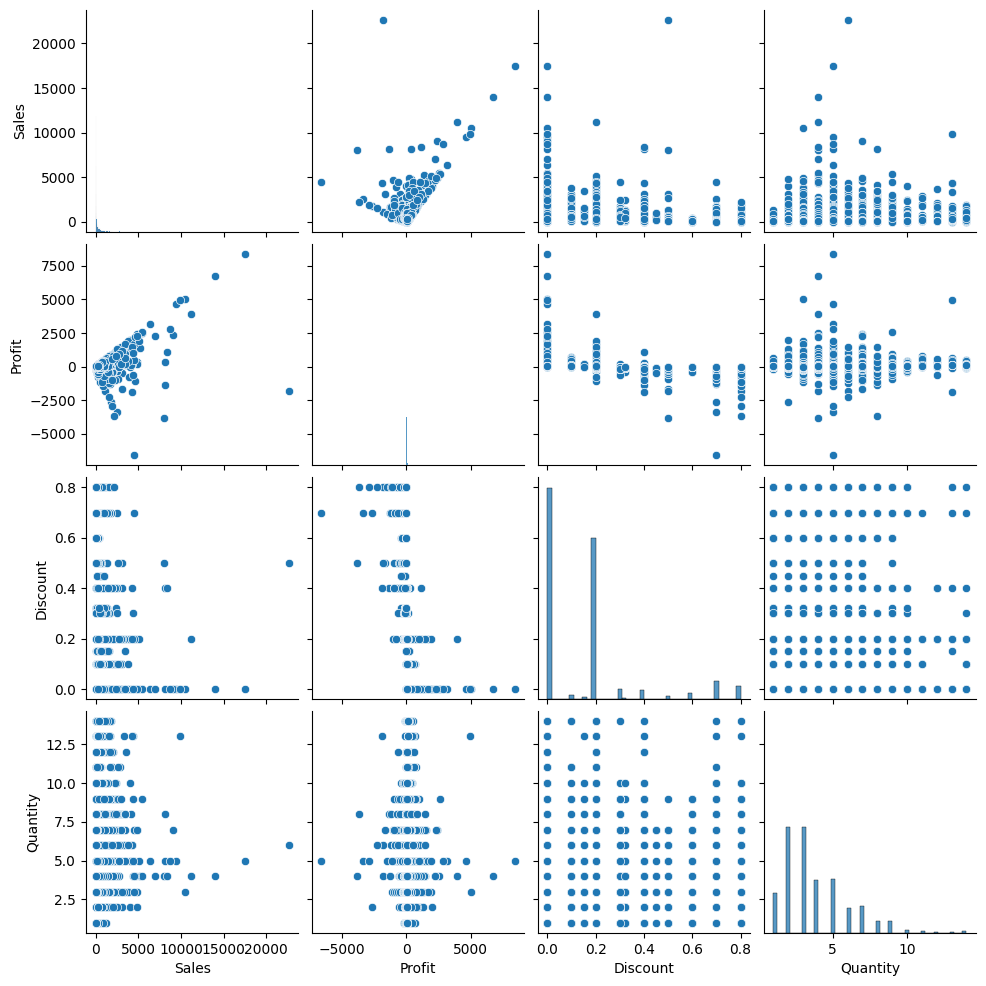

Mean Squared Error (MSE): 374611609062668603489394138021888.00
Root Mean Squared Error (RMSE): 19354885922233400.00
R-squared (R2 Score): -7726320251093164865789886464.00


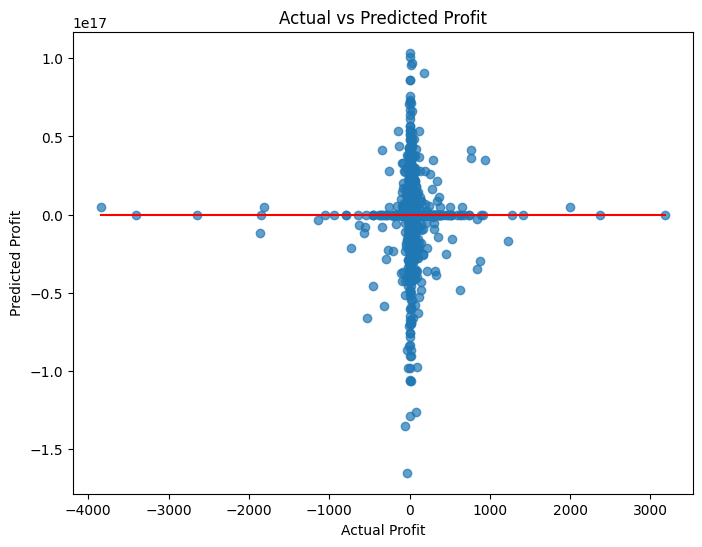

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load the Dataset from GitHub
github_raw_url = "https://raw.githubusercontent.com/Pratyakshgupta887qwert/Shadowfox-intership-intermediate-task-1/master/Sample%20-%20Superstore.csv"

# Handle encoding issues
try:
    data = pd.read_csv(github_raw_url, encoding="latin1", low_memory=False)
    print("Dataset loaded successfully!")
except UnicodeDecodeError:
    print("UnicodeDecodeError occurred. Trying with automatic encoding detection...")
    import requests
    from charset_normalizer import detect

    # Detect the encoding
    response = requests.get(github_raw_url)
    detected_encoding = detect(response.content)["encoding"]

    # Load with the detected encoding
    data = pd.read_csv(github_raw_url, encoding=detected_encoding, low_memory=False)
    print(f"Dataset loaded successfully with encoding: {detected_encoding}")

# Display the first few rows of the dataset
print(data.head())

# 2. Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Summary statistics
print("Summary statistics:")
print(data.describe())

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot for selected features
# Ensure the features exist in your dataset before running this line
# Modify the feature list according to your dataset
selected_features = ['Sales', 'Profit', 'Discount', 'Quantity']  # Adjust based on your dataset
if all(feature in data.columns for feature in selected_features):
    sns.pairplot(data[selected_features])
    plt.show()
else:
    print(f"Selected features {selected_features} not found in the dataset.")

# 3. Split the Data
# Ensure your dataset has a valid target column
# Replace 'Target' with the name of your actual target column
if 'Profit' in data.columns:  # Example target column
    X = data.drop('Profit', axis=1, errors='ignore')  # Features
    y = data['Profit']  # Target variable

    # Convert categorical columns to numeric using one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
else:
    print("Target column not found in the dataset.")
    exit()

# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Model Selection and Training
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Evaluate the Model
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2 Score): {r2:.2f}")

# 7. Plot Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Actual vs Predicted Profit")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()
